In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("data/training.csv")
test_data = pd.read_csv("data/test.csv")
validation_data = pd.read_csv("data/validation.csv")

In [33]:
merged = pd.concat([train_data, test_data, validation_data])
merged_labels = merged["label"]

In [42]:
def get_hist(labels):
    # Create a histogram
    hist, bins = np.histogram(labels, bins=6)  # You can adjust the number of bins as needed

    # Calculate the bin width
    bin_width = bins[1] - bins[0]

    # Normalize the histogram
    hist_normalized = hist / (np.sum(hist) * bin_width)
    return bins, hist_normalized, bin_width

In [44]:
# Check the label distribution
def plot_hist(labels):
    bins, hist_normalized , bin_width = get_hist(labels) 
    # Create the histogram plot
    plt.bar(bins[:-1], hist_normalized, width=bin_width, align='center')
    plt.xlabel('Label Values')
    plt.ylabel('Normalized Frequency')
    plt.title('Normalized Histogram of Labels')
    plt.show()

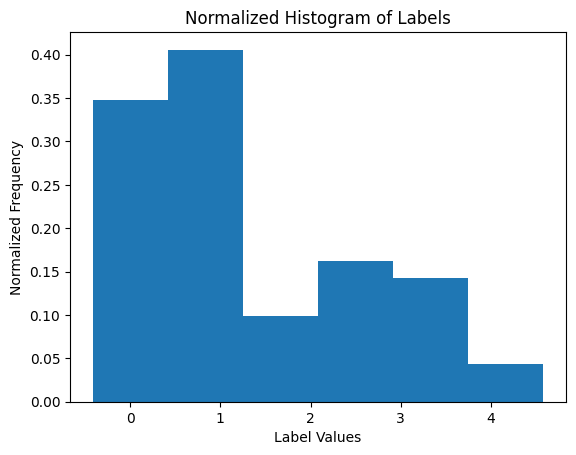

In [36]:
_, hist_normalized, _ = get_hist(merged_labels)
plot_hist(merged_labels)

In [48]:
true_weights = 1.0 / (hist_normalized * 1000)
print(true_weights)
print(hist_normalized)

[0.00287505 0.00246512 0.01015641 0.00615233 0.00702346 0.02318034]
[0.34782 0.40566 0.09846 0.16254 0.14238 0.04314]


In [46]:
# Plot the distribution of each dataset
print(get_hist(train_data['label']))
print(get_hist(test_data['label']))
print(get_hist(validation_data['label']))

(array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        ]), array([0.34995 , 0.40215 , 0.0978  , 0.161925, 0.145275, 0.0429  ]), 0.8333333333333334)
(array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        ]), array([0.3486, 0.417 , 0.0954, 0.165 , 0.1344, 0.0396]), 0.8333333333333334)
(array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        ]), array([0.33  , 0.4224, 0.1068, 0.165 , 0.1272, 0.0486]), 0.8333333333333334)


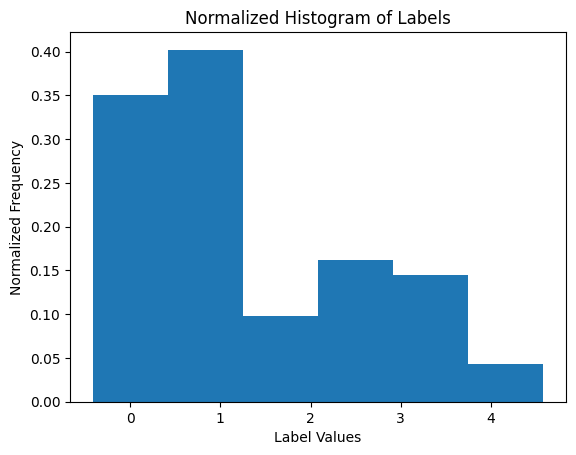

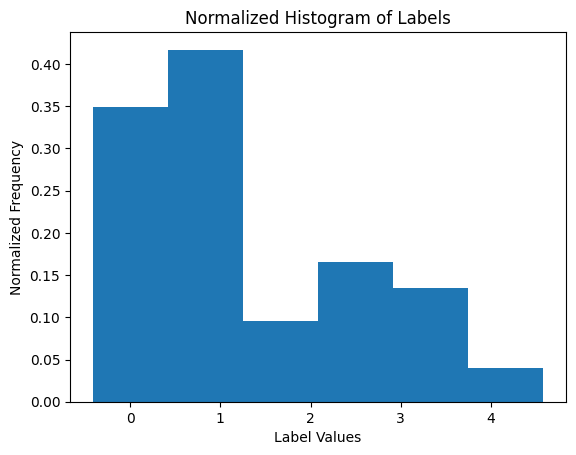

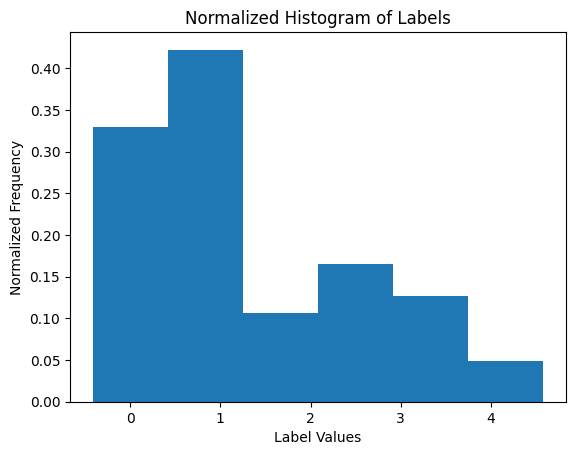

In [45]:
# Plot the distribution of each dataset
plot_hist(train_data['label'])
plot_hist(test_data['label'])
plot_hist(validation_data['label'])

